# Loading The Data

In [3]:
import os
import nibabel as nib

# Base directory where the data folders are located
base_directory = "data1"  # Adjust this path to the actual location

# Lists to store file paths
hgg_files = []
lgg_files = []

# Function to recursively find .nii files
def find_nii_files(directory, file_list):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.nii'):
                file_list.append(os.path.join(root, file))

# Process each training dataset year
for year in ["MICCAI_BraTS_2018_Data_Training", "MICCAI_BraTS_2019_Data_Training"]:
    hgg_dir = os.path.join(base_directory, year, "HGG")
    lgg_dir = os.path.join(base_directory, year, "LGG")

    # Find .nii files in HGG and LGG directories
    find_nii_files(hgg_dir, hgg_files)
    find_nii_files(lgg_dir, lgg_files)

# Output the results
print(f"Total HGG .nii files found: {len(hgg_files)}")
print(f"Total LGG .nii files found: {len(lgg_files)}")

# Example to display data from the first HGG file, if there are any
if hgg_files:
    file_path = hgg_files[0]
    img = nib.load(file_path)
    data = img.get_fdata()
    print(f"Data shape from the first HGG file: {data.shape}")
    print(f"Data max value: {data.max()}")
    print(f"Data min value: {data.min()}")
else:
    print("No HGG .nii files found.")


Total HGG .nii files found: 2345
Total LGG .nii files found: 755
Data shape from the first HGG file: (240, 240, 155)
Data max value: 1273.0
Data min value: 0.0


# 

# Visualization and EDA

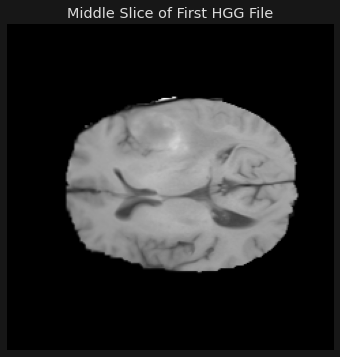

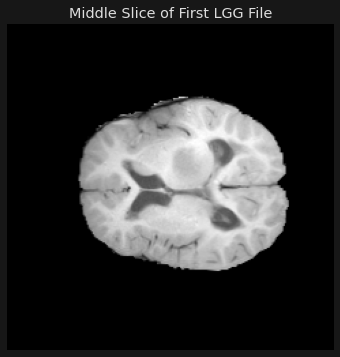

In [6]:
import matplotlib.pyplot as plt

# Function to display a slice of a 3D image
def display_slice(img_data, slice_index, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(img_data[:, :, slice_index], cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the middle slice of the first HGG file
if hgg_files:
    hgg_img = nib.load(hgg_files[2])
    hgg_data = hgg_img.get_fdata()
    middle_slice = hgg_data.shape[2] // 2
    display_slice(hgg_data, middle_slice, 'Middle Slice of First HGG File')

# Display the middle slice of the first LGG file
if lgg_files:
    lgg_img = nib.load(lgg_files[2])
    lgg_data = lgg_img.get_fdata()
    middle_slice = lgg_data.shape[2] // 2
    display_slice(lgg_data, middle_slice, 'Middle Slice of First LGG File')

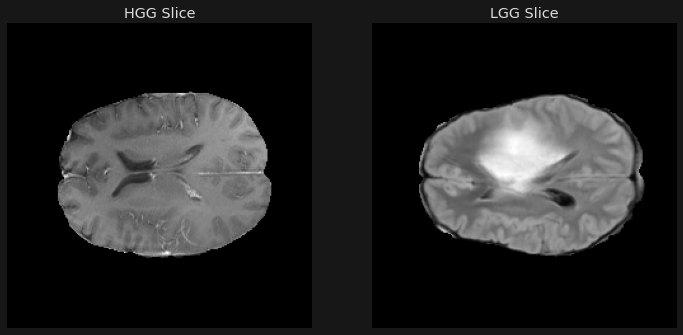

In [10]:
# Function to display two slices side by side for comparison
def compare_slices(hgg_data, lgg_data, slice_index):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(hgg_data[:, :, slice_index], cmap='gray')
    plt.title('HGG Slice')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(lgg_data[:, :, slice_index], cmap='gray')
    plt.title('LGG Slice')
    plt.axis('off')
    
    plt.show()

# Compare the middle slices of the first HGG and LGG files
if hgg_files and lgg_files:
    middle_slice_hgg = hgg_data.shape[2] // 2
    middle_slice_lgg = lgg_data.shape[2] // 2
    compare_slices(hgg_data, lgg_data, middle_slice_hgg)

HGG file with most variation: data1\MICCAI_BraTS_2018_Data_Training\HGG\Brats18_TCIA01_499_1\Brats18_TCIA01_499_1_t1ce.nii
LGG file with most variation: data1\MICCAI_BraTS_2018_Data_Training\LGG\Brats18_TCIA10_639_1\Brats18_TCIA10_639_1_flair.nii


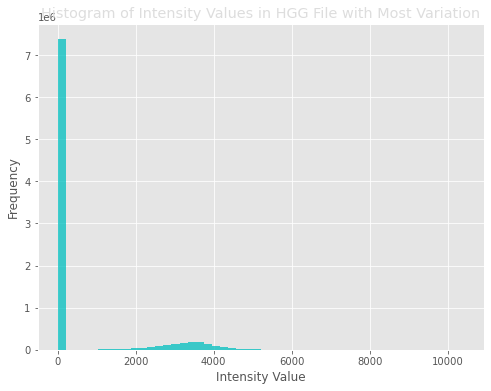

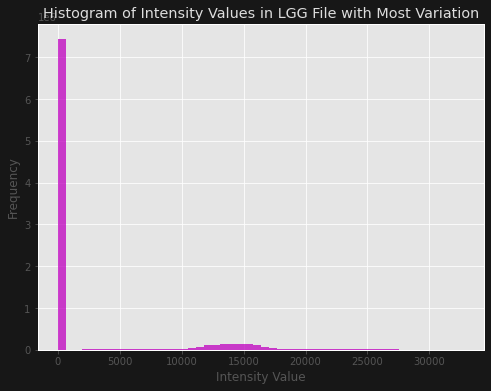

In [62]:
def calculate_intensity_variation(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return np.std(data)
# Find the HGG file with the most variations in intensity
hgg_variations = [(file, calculate_intensity_variation(file)) for file in hgg_files]
hgg_file_most_variation = max(hgg_variations, key=lambda x: x[1])[0]

# Find the LGG file with the most variations in intensity
lgg_variations = [(file, calculate_intensity_variation(file)) for file in lgg_files]
lgg_file_most_variation = max(lgg_variations, key=lambda x: x[1])[0]

print(f"HGG file with most variation: {hgg_file_most_variation}")
print(f"LGG file with most variation: {lgg_file_most_variation}")

# Plot histogram for the selected HGG file
hgg_img = nib.load(hgg_file_most_variation)
hgg_data = hgg_img.get_fdata()
plt.figure(figsize=(8, 6))
plt.hist(hgg_data.flatten(), bins=50, color='c', alpha=0.75)
plt.title('Histogram of Intensity Values in HGG File with Most Variation')
plt.xlabel('Intensity Value')
plt.gcf().set_facecolor('white')

plt.ylabel('Frequency')
plt.show()

# Plot histogram for the selected LGG file
lgg_img = nib.load(lgg_file_most_variation)
lgg_data = lgg_img.get_fdata()
plt.figure(figsize=(8, 6))
plt.hist(lgg_data.flatten(), bins=50, color='m', alpha=0.75)
plt.title('Histogram of Intensity Values in LGG File with Most Variation')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

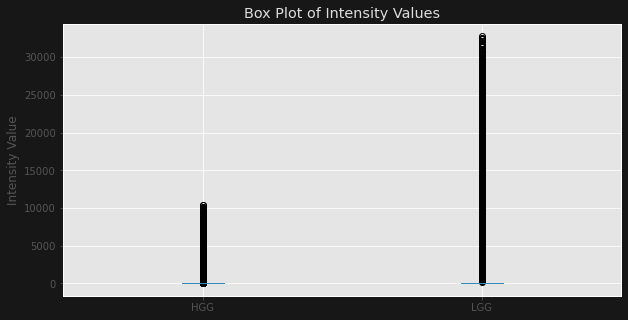

In [13]:
hgg_intensities = hgg_data.flatten()
lgg_intensities = lgg_data.flatten()

plt.figure(figsize=(10, 5))
plt.boxplot([hgg_intensities, lgg_intensities], labels=['HGG', 'LGG'])
plt.title('Box Plot of Intensity Values')
plt.ylabel('Intensity Value')
plt.show()

In [15]:

# Lists to store file paths
hgg_files = []
lgg_files = []
hgg_seg_files = []
lgg_seg_files = []

# Function to recursively find .nii files and their corresponding segmentation files
def find_nii_files_and_segments(directory, file_list, seg_file_list):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.nii') and '_seg' not in file:
                file_list.append(os.path.join(root, file))
            elif file.endswith('.nii') and '_seg' in file:
                seg_file_list.append(os.path.join(root, file))

# Process each training dataset year
for year in ["MICCAI_BraTS_2018_Data_Training", "MICCAI_BraTS_2019_Data_Training"]:
    hgg_dir = os.path.join(base_directory, year, "HGG")
    lgg_dir = os.path.join(base_directory, year, "LGG")

    # Find .nii files and their segments in HGG and LGG directories
    find_nii_files_and_segments(hgg_dir, hgg_files, hgg_seg_files)
    find_nii_files_and_segments(lgg_dir, lgg_files, lgg_seg_files)

# Output the results
print(f"Total HGG .nii files found: {len(hgg_files)}")
print(f"Total HGG .nii segmentation files found: {len(hgg_seg_files)}")
print(f"Total LGG .nii files found: {len(lgg_files)}")
print(f"Total LGG .nii segmentation files found: {len(lgg_seg_files)}")

# Example to display data from the first HGG file and its segmentation, if there are any
if hgg_files and hgg_seg_files:
    file_path = hgg_files[0]
    seg_file_path = hgg_seg_files[0]
    img = nib.load(file_path)
    seg_img = nib.load(seg_file_path)
    data = img.get_fdata()
    seg_data = seg_img.get_fdata()
    print(f"Data shape from the first HGG file: {data.shape}")
    print(f"Segmentation data shape: {seg_data.shape}")
    print(f"Data max value: {data.max()}")
    print(f"Data min value: {data.min()}")
    print(f"Segmentation max value: {seg_data.max()}")
    print(f"Segmentation min value: {seg_data.min()}")
else:
    print("No HGG .nii files or segmentation files found.")

Total HGG .nii files found: 1876
Total HGG .nii segmentation files found: 469
Total LGG .nii files found: 604
Total LGG .nii segmentation files found: 151
Data shape from the first HGG file: (240, 240, 155)
Segmentation data shape: (240, 240, 155)
Data max value: 1273.0
Data min value: 0.0
Segmentation max value: 4.0
Segmentation min value: 0.0


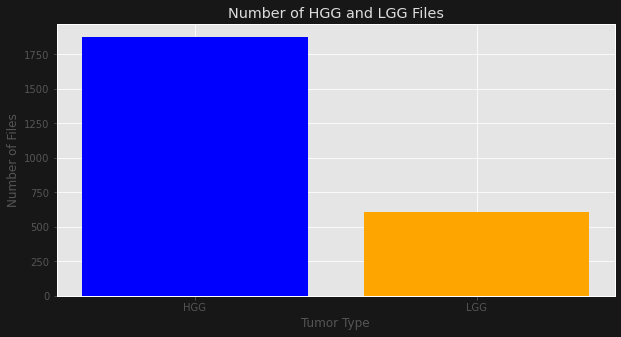

In [22]:
# Plot number of HGG and LGG files
def plot_file_counts(hgg_files, lgg_files):
    labels = ['HGG', 'LGG']
    counts = [len(hgg_files), len(lgg_files)]

    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color=['blue', 'orange'])
    plt.xlabel('Tumor Type')
    plt.ylabel('Number of Files')
    plt.title('Number of HGG and LGG Files')
    plt.show()

# Plot the counts
plot_file_counts(hgg_files, lgg_files)

C:\Users\AMAN\AppData\Local\Temp\ipykernel_11704\4250060210.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


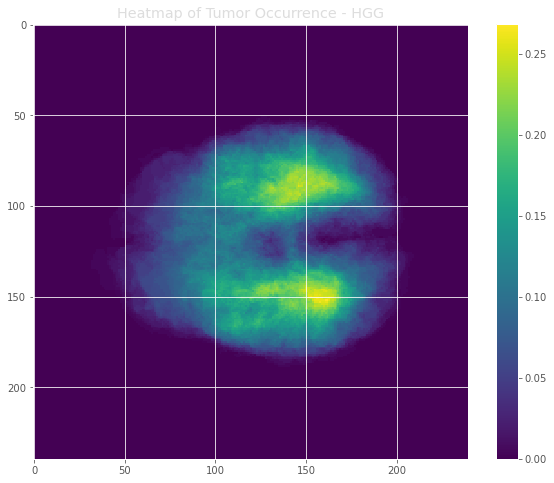

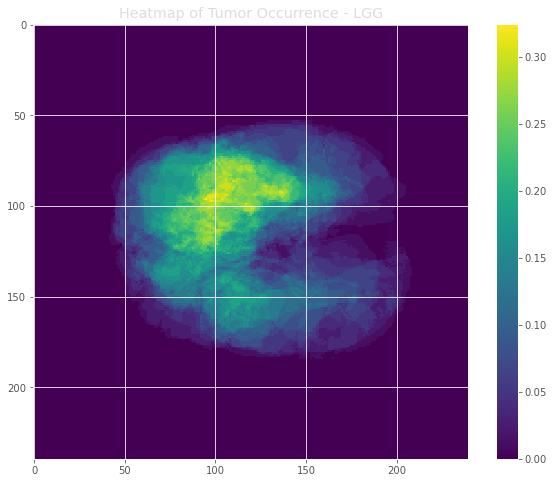

In [27]:
# Function to create a heatmap from segmentation files
def create_heatmap(seg_files, title):
    # Load the first file to get the shape
    example_file = nib.load(seg_files[0])
    shape = example_file.shape
    heatmap = np.zeros(shape)

    # Sum all segmentation masks
    for file in seg_files:
        seg_data = nib.load(file).get_fdata()
        heatmap += (seg_data > 0).astype(int)

    # Normalize the heatmap by the number of files
    heatmap /= len(seg_files)

    # Plot the heatmap for a slice in the middle of the volume
    mid_slice = shape[2] // 2
    plt.figure(figsize=(10, 8))
    
    # Set the background color to white explicitly
    plt.gcf().set_facecolor('white')
    
    # Choose a different colormap
    plt.imshow(heatmap[:, :, mid_slice], cmap='viridis', interpolation='nearest', aspect='equal')
    
    plt.colorbar()
    plt.title(f'Heatmap of Tumor Occurrence - {title}')
    plt.show()

# Create and plot heatmaps for HGG and LGG segmentation files
if hgg_seg_files:
    create_heatmap(hgg_seg_files, 'HGG')
else:
    print("No HGG segmentation files found.")

if lgg_seg_files:
    create_heatmap(lgg_seg_files, 'LGG')
else:
    print("No LGG segmentation files found.")


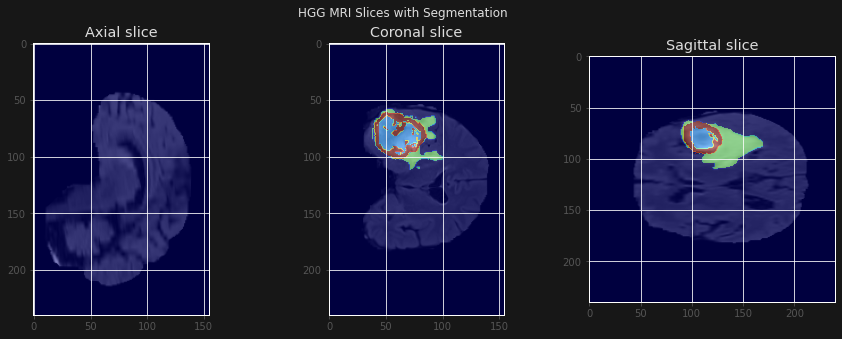

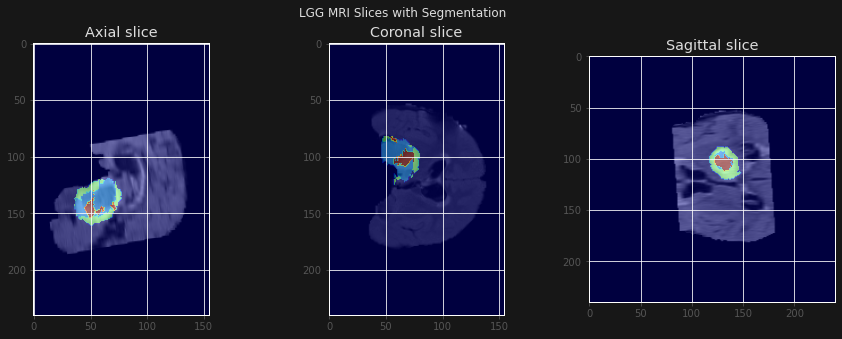

In [19]:
# Function to plot MRI slices with segmentation overlay
def plot_slices_with_segmentation(data, seg_data, title="MRI Slices with Segmentation"):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    slices = [data.shape[0] // 2, data.shape[1] // 2, data.shape[2] // 2]
    
    # Axial slice
    axes[0].imshow(data[slices[0], :, :], cmap='gray')
    axes[0].imshow(seg_data[slices[0], :, :], cmap='jet', alpha=0.5)
    axes[0].set_title('Axial slice')
    
    # Coronal slice
    axes[1].imshow(data[:, slices[1], :], cmap='gray')
    axes[1].imshow(seg_data[:, slices[1], :], cmap='jet', alpha=0.5)
    axes[1].set_title('Coronal slice')
    
    # Sagittal slice
    axes[2].imshow(data[:, :, slices[2]], cmap='gray')
    axes[2].imshow(seg_data[:, :, slices[2]], cmap='jet', alpha=0.5)
    axes[2].set_title('Sagittal slice')
    
    plt.suptitle(title)
    plt.show()

# Load and plot an example HGG file with segmentation
if hgg_files and hgg_seg_files:
    file_path = hgg_files[0]
    seg_file_path = hgg_seg_files[0]
    img = nib.load(file_path)
    seg_img = nib.load(seg_file_path)
    data = img.get_fdata()
    seg_data = seg_img.get_fdata()
    plot_slices_with_segmentation(data, seg_data, title="HGG MRI Slices with Segmentation")

# Load and plot an example LGG file with segmentation
if lgg_files and lgg_seg_files:
    file_path = lgg_files[0]
    seg_file_path = lgg_seg_files[0]
    img = nib.load(file_path)
    seg_img = nib.load(seg_file_path)
    data = img.get_fdata()
    seg_data = seg_img.get_fdata()
    plot_slices_with_segmentation(data, seg_data, title="LGG MRI Slices with Segmentation")

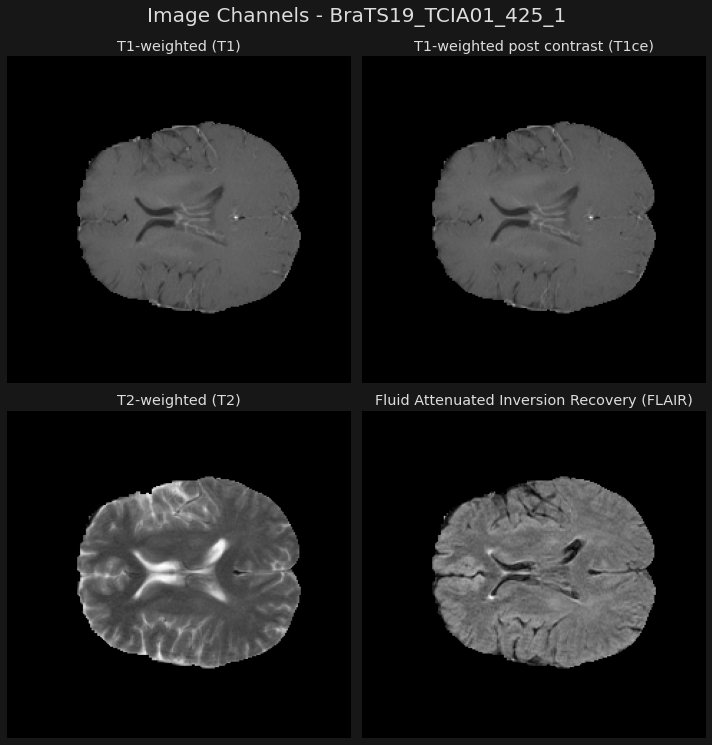

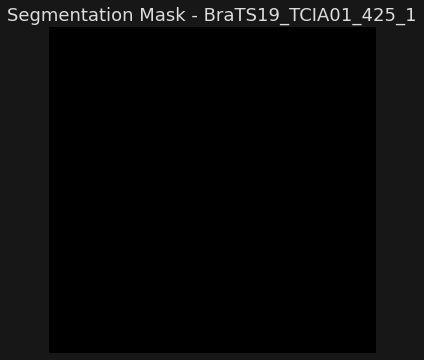

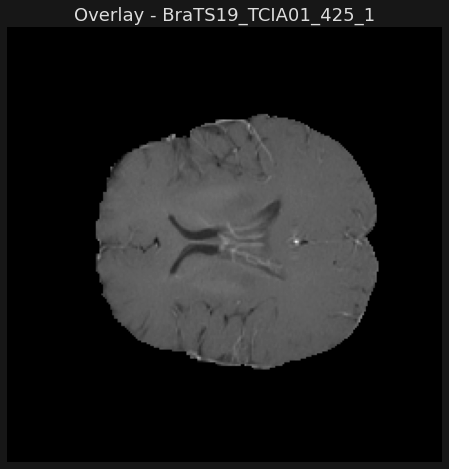

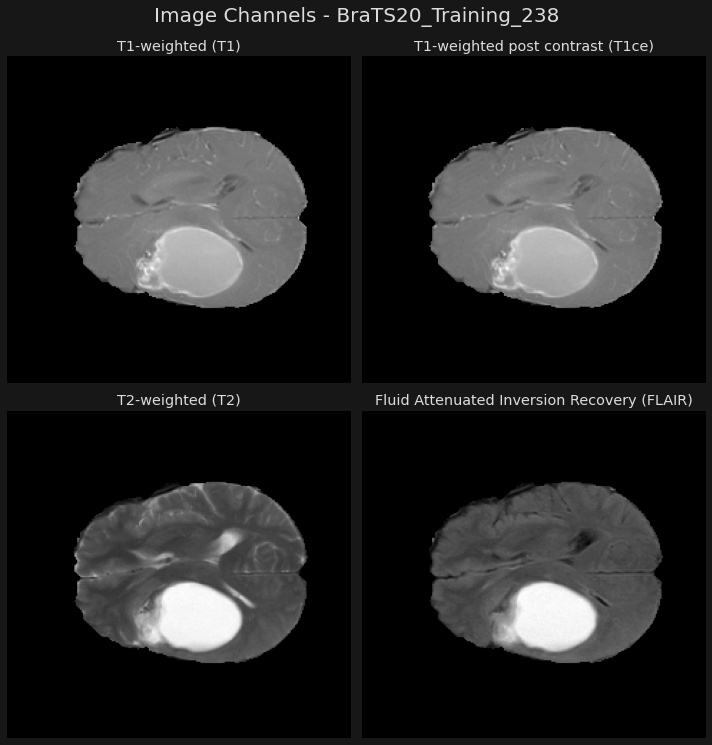

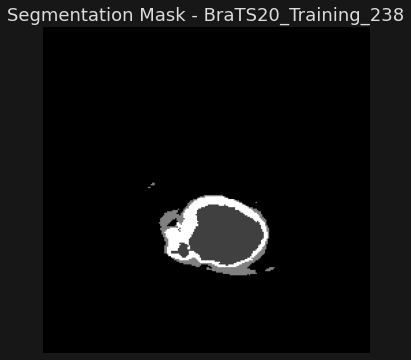

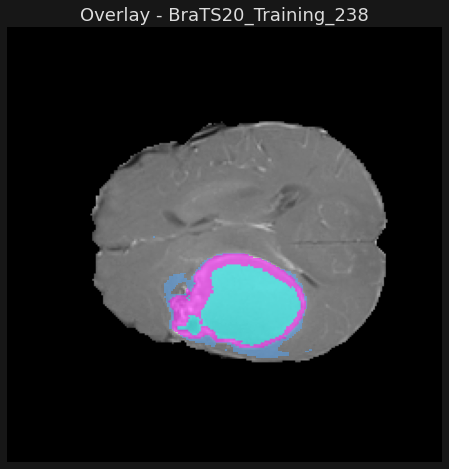

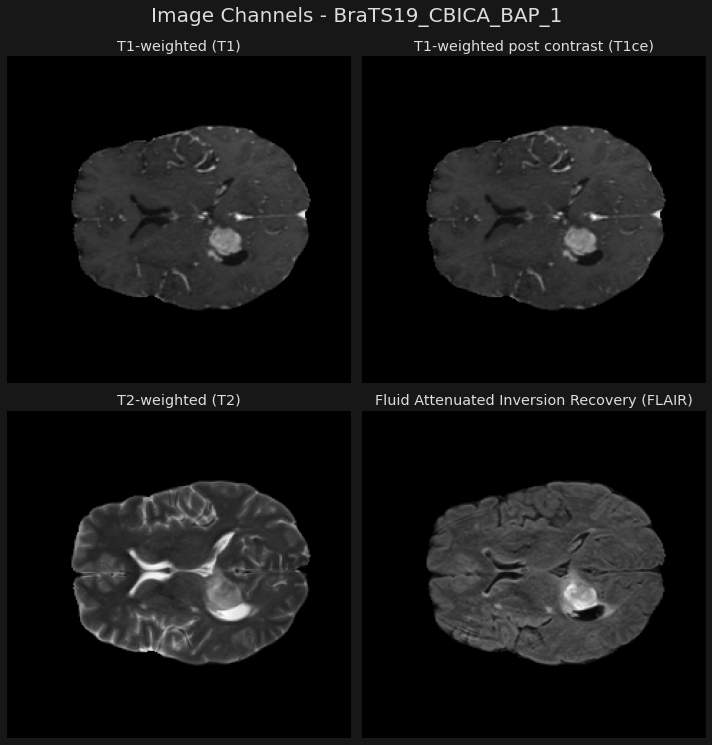

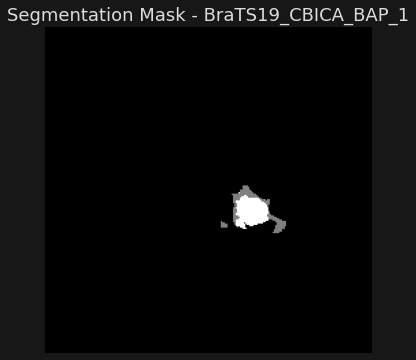

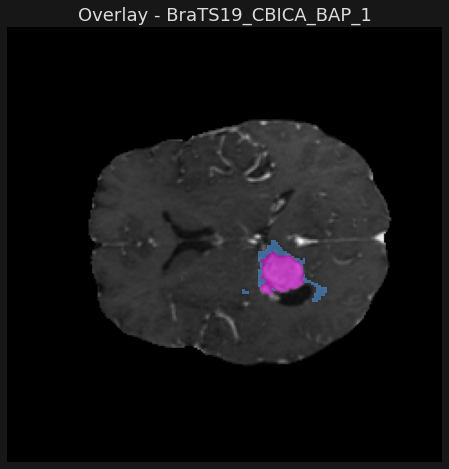

In [2]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = '#171717'
plt.rcParams['text.color'] = '#DDDDDD'

def display_image_channels(images, title='Image Channels'):
    channel_names = ['T1-weighted (T1)', 'T1-weighted post contrast (T1ce)', 'T2-weighted (T2)', 'Fluid Attenuated Inversion Recovery (FLAIR)']
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    for idx, ax in enumerate(axes.flatten()):
        # Select the middle slice in the 3rd dimension
        slice_idx = images[idx].shape[2] // 2
        img = images[idx][:, :, slice_idx]
        img_normalized = (img - img.min()) / (img.max() - img.min())
        ax.imshow(img_normalized, cmap='gray', aspect='auto')
        ax.axis('off')
        ax.set_title(channel_names[idx])
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()

def display_mask(mask, title='Segmentation Mask'):
    # Display the middle slice
    slice_idx = mask.shape[2] // 2
    plt.figure(figsize=(6, 6))
    plt.imshow(mask[:, :, slice_idx], cmap='gray')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

def overlay_masks_on_image(images, mask, title='Brain MRI with Tumour Masks Overlay'):
    slice_idx = images[0].shape[2] // 2
    t1_image = images[0][:, :, slice_idx]
    t1_image_normalized = (t1_image - t1_image.min()) / (t1_image.max() - t1_image.min())
    mask_overlay = np.ma.masked_where(mask[:, :, slice_idx] == 0, mask[:, :, slice_idx])

    plt.figure(figsize=(8, 8))
    plt.imshow(t1_image_normalized, cmap='gray')
    plt.imshow(mask_overlay, cmap='cool', alpha=0.5)
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()


# Base directory where the data folders are located
base_directory = "data1"  # Adjust this path to the actual location

# Collect all subdirectories containing the NII files
patient_folders = []
for root, dirs, files in os.walk(base_directory):
    for dir in dirs:
        full_path = os.path.join(root, dir)
        if any(file.endswith('.nii') for file in os.listdir(full_path)):
            patient_folders.append(full_path)

# Optionally, select a random subset of folders to display, e.g., 3 folders
selected_folders = random.sample(patient_folders, min(len(patient_folders), 3))

# Load and display each selected folder
for folder in selected_folders:
    try:
        # Get all .nii files and sort them
        files = os.listdir(folder)
        nii_files = sorted([f for f in files if f.endswith('.nii')])
        
        # Expecting files to be named with a prefix like 'BraTS19_CBICA_AOO_1_t1.nii'
        modalities = {'t1': None, 't1ce': None, 't2': None, 'flair': None, 'seg': None}
        for file in nii_files:
            for key in modalities:
                if key in file:
                    modalities[key] = nib.load(os.path.join(folder, file)).get_fdata()

        images = [modalities['t1'], modalities['t1ce'], modalities['t2'], modalities['flair']]
        seg_data = modalities['seg']

        # Display the images and masks using the defined functions
        display_image_channels(images, title=f'Image Channels - {os.path.basename(folder)}')
        display_mask(seg_data, title=f'Segmentation Mask - {os.path.basename(folder)}')
        overlay_masks_on_image(images, seg_data, title=f'Overlay - {os.path.basename(folder)}')

    except Exception as e:
        print(f"Error processing folder {folder}: {e}")


HGG Files: ['data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_10_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_11_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_12_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_13_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_14_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_17_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_18_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_19_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_20_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_21_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_22_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_23_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_25_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_26_1', 'data1\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_27_1'

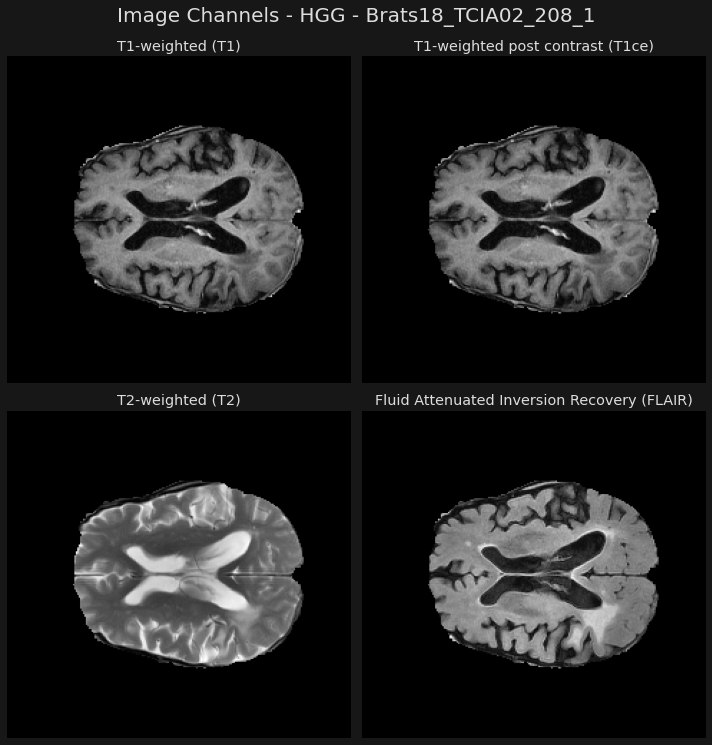

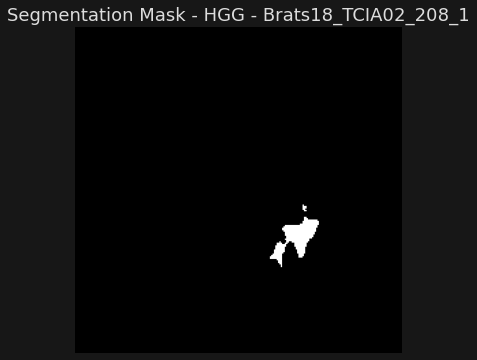

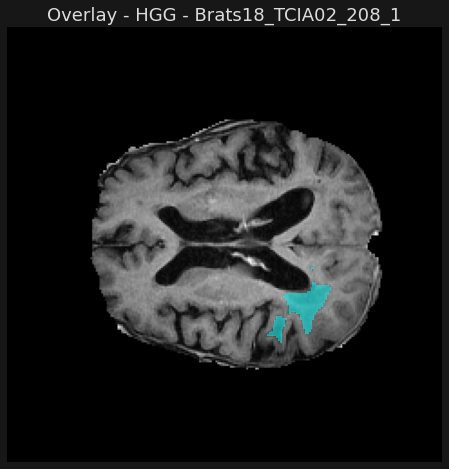

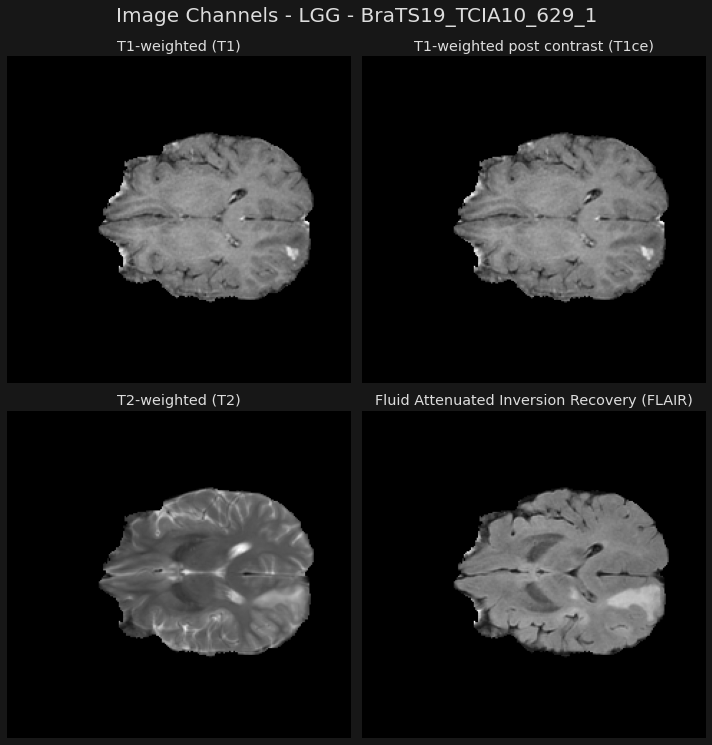

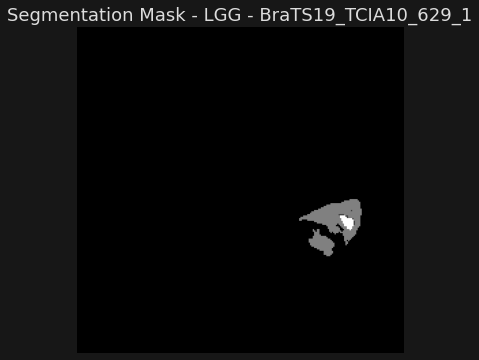

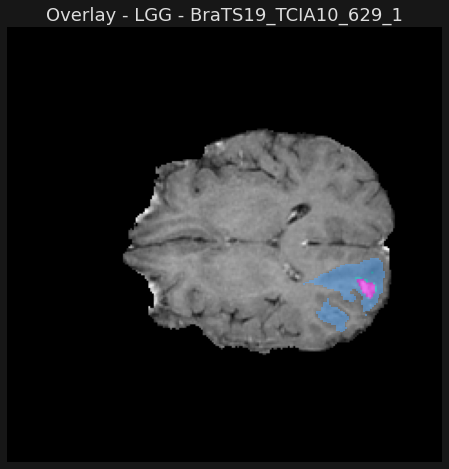

In [3]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = '#171717'
plt.rcParams['text.color'] = '#DDDDDD'

def display_image_channels(images, title='Image Channels'):
    channel_names = ['T1-weighted (T1)', 'T1-weighted post contrast (T1ce)', 'T2-weighted (T2)', 'Fluid Attenuated Inversion Recovery (FLAIR)']
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    for idx, ax in enumerate(axes.flatten()):
        # Select the middle slice in the 3rd dimension
        slice_idx = images[idx].shape[2] // 2
        img = images[idx][:, :, slice_idx]
        img_normalized = (img - img.min()) / (img.max() - img.min())
        ax.imshow(img_normalized, cmap='gray', aspect='auto')
        ax.axis('off')
        ax.set_title(channel_names[idx])
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()

def display_mask(mask, title='Segmentation Mask'):
    # Display the middle slice
    slice_idx = mask.shape[2] // 2
    plt.figure(figsize=(6, 6))
    plt.imshow(mask[:, :, slice_idx], cmap='gray')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

def overlay_masks_on_image(images, mask, title='Brain MRI with Tumour Masks Overlay'):
    slice_idx = images[0].shape[2] // 2
    t1_image = images[0][:,:, slice_idx]
    t1_image_normalized = (t1_image - t1_image.min()) / (t1_image.max() - t1_image.min())
    mask_overlay = np.ma.masked_where(mask[:, :, slice_idx] == 0, mask[:, :, slice_idx])

    plt.figure(figsize=(8, 8))
    plt.imshow(t1_image_normalized, cmap='gray')
    plt.imshow(mask_overlay, cmap='cool', alpha=0.5)
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

# Base directory where the data folders are located
base_directory = "data1"  # Adjust this path to the actual location

# Collect all subdirectories containing the NII files
hgg_folders = []
lgg_folders = []

for root, dirs, files in os.walk(base_directory):
    for dir in dirs:
        full_path = os.path.join(root, dir)
        if any(file.endswith('.nii') for file in os.listdir(full_path)):
            if 'HGG' in full_path:
                hgg_folders.append(full_path)
            elif 'LGG' in full_path:
                lgg_folders.append(full_path)

print(f"HGG Files: {hgg_folders}")
print(f"LGG Files: {lgg_folders}")

# Select one random folder from HGG and one from LGG
selected_folders = []
if hgg_folders:
    selected_folders.append(('HGG', random.choice(hgg_folders)))
if lgg_folders:
    selected_folders.append(('LGG', random.choice(lgg_folders)))

# Load and display each selected folder
for label, folder in selected_folders:
    try:
        # Get all .nii files and sort them
        files = os.listdir(folder)
        nii_files = sorted([f for f in files if f.endswith('.nii')])
        
        # Expecting files to be named with a prefix like 'BraTS19_CBICA_AOO_1_t1.nii'
        modalities = {'t1': None, 't1ce': None, 't2': None, 'flair': None, 'seg': None}
        for file in nii_files:
            for key in modalities:
                if key in file:
                    modalities[key] = nib.load(os.path.join(folder, file)).get_fdata()

        images = [modalities['t1'], modalities['t1ce'], modalities['t2'], modalities['flair']]
        seg_data = modalities['seg']

        # Display the images and masks using the defined functions
        display_image_channels(images, title=f'Image Channels - {label} - {os.path.basename(folder)}')
        display_mask(seg_data, title=f'Segmentation Mask - {label} - {os.path.basename(folder)}')
        overlay_masks_on_image(images, seg_data, title=f'Overlay - {label} - {os.path.basename(folder)}')

    except Exception as e:
        print(f"Error processing folder {folder}: {e}")


In [2]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import nibabel as nib

class BrainScanDataset(Dataset):
    def __init__(self, file_paths, slice_idx=90):
        self.file_paths = file_paths
        self.slice_idx = slice_idx

    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        file_path = self.file_paths[idx]
        image_file = nib.load(file_path)
        image_data = image_file.get_fdata()

        mask_file_path = file_path.replace('image', 'mask')  # Assumes naming convention
        mask_file = nib.load(mask_file_path)
        mask_data = mask_file.get_fdata()

        image_slice = image_data[:, :, self.slice_idx]
        mask_slice = mask_data[:, :, self.slice_idx]

        # Reshape to (1, 240, 240)
        image_slice = np.expand_dims(image_slice, axis=-1)
        mask_slice = np.expand_dims(mask_slice, axis=-1)

        # Normalize
        image_slice = (image_slice - np.min(image_slice)) / (np.max(image_slice) - np.min(image_slice) + 1e-6)
        mask_slice = (mask_slice - np.min(mask_slice)) / (np.max(mask_slice) - np.min(mask_slice) + 1e-6)

        image_tensor = torch.tensor(image_slice, dtype=torch.float32)
        mask_tensor = torch.tensor(mask_slice, dtype=torch.float32)

        return image_tensor, mask_tensor

# Assuming all_files has already been created and contains all your nii file paths.
all_files = hgg_files + lgg_files  # this should be populated with paths to your .nii files

# Shuffle and split the dataset into training and validation sets (90:10)
np.random.seed(42)
np.random.shuffle(all_files)
split_idx = int(0.9 * len(all_files))
train_files = all_files[:split_idx]
val_files = all_files[split_idx:]

# Initialize datasets
train_dataset = BrainScanDataset(train_files)
val_dataset = BrainScanDataset(val_files)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=5, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=5, shuffle=False)

# Example usage: Print shapes of data batches
for images, masks in train_dataloader:
    print("Training batch - Images shape:", images[0].shape)
    print("Training batch - Masks shape:", masks[0].shape)
    break

for images, masks in val_dataloader:
    print("Validation batch - Images shape:", images[0].shape)
    print("Validation batch - Masks shape:", masks[0].shape)
    break


Training batch - Images shape: torch.Size([240, 240, 1])
Training batch - Masks shape: torch.Size([240, 240, 1])
Validation batch - Images shape: torch.Size([240, 240, 1])
Validation batch - Masks shape: torch.Size([240, 240, 1])


In [ ]:
print("Total files for training:", len(train_files))
print("Total files for validation:", len(val_files))

train_dataset = BrainScanDataset(train_files)
val_dataset = BrainScanDataset(val_files)

print("Training dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))

if len(train_dataset) == 0:
    raise ValueError("Training dataset is empty. Check the file paths and filtering.")
if len(val_dataset) == 0:
    raise ValueError("Validation dataset is empty. Check the file paths and filtering.")


In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Example of accessing a single batch from the DataLoader
data_iter = iter(train_loader)
inputs, targets = next(data_iter)

# You might want to apply any necessary preprocessing if it's not included in your Dataset class
# For example, if your model expects a certain input size or normalization

# Move the batch to the same device as your model
inputs = inputs.to(device)
targets = targets.to(device)
# Print the shapes of inputs and targets
print(f"Sample Inputs Shape: {inputs.shape}")
print(f"Sample Targets Shape: {targets.shape}")


In [ ]:
# Corrected code to print the details of the first slice in the batch:
print("Sample Input Data (one volume slice):", inputs[0].cpu().numpy())  # Get the first slice in the batch and convert it to numpy for display
print("Sample Target Labels:", targets.cpu().numpy())  # Convert targets to numpy for display if necessary

In [ ]:
# Correctly accessing the first 2D image in the batch
slice_data = inputs[0].cpu().numpy()  # This gets the entire 2D slice for the first item in the batch

print("Detailed values of the slice:", slice_data)
print("Max value in slice:", slice_data.max())
print("Min value in slice:", slice_data.min())
print("Unique values in the slice:", np.unique(slice_data))
print("Shape of the input batch:", inputs.shape)

# 

# Unet

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import nibabel as nib
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from tqdm import tqdm

import numpy as np
from sklearn.model_selection import train_test_split
from torchvision import transforms

class MRIDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        img = nib.load(img_path).get_fdata()

        if img.ndim == 3:
            img = img[:, :, img.shape[2] // 2]
        img = np.expand_dims(img, axis=0)
        
        img = torch.tensor(img, dtype=torch.float32)
        
        # Apply transformations if available
        if self.transform:
            img = self.transform(img)

        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return img, label


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import nibabel as nib
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from tqdm import tqdm
from torchvision import transforms
from imblearn.over_sampling import RandomOverSampler

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.double_conv(x.to(self.double_conv[0].weight.dtype))  # Convert input to the same dtype as weights
        return x

class UpConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpConv, self).__init__()
        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
        self.conv = DoubleConv(out_channels, out_channels)

    def forward(self, x):
        x = self.up(x)
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, input_shape=(1, 240, 240), n_classes=1):
        super(UNet, self).__init__()
        self.input_shape = input_shape

        self.inc = DoubleConv(input_shape[0], 64)
        self.down1 = DoubleConv(64, 128)
        self.down2 = DoubleConv(128, 256)
        self.up1 = UpConv(256, 128)
        self.up2 = UpConv(128, 64)
        self.outc = nn.Conv2d(64, n_classes, kernel_size=1)
        self.final_layer = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(n_classes, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.inc(x)
        x = F.max_pool2d(self.down1(x), 2)
        x = F.max_pool2d(self.down2(x), 2)
        x = F.interpolate(self.up1(x), scale_factor=2)
        x = F.interpolate(self.up2(x), scale_factor=2)
        x = self.outc(x)
        x = self.final_layer(x)
        return x

    

# Define data augmentation transforms
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
])

# Assuming 'hgg_files' and 'lgg_files' are preloaded lists of file paths
all_files = hgg_files + lgg_files
labels = [1] * len(hgg_files) + [0] * len(lgg_files)

# Oversample the minority class
ros = RandomOverSampler()
all_files_resampled, labels_resampled = ros.fit_resample(np.array(all_files).reshape(-1, 1), labels)
all_files_resampled = all_files_resampled.flatten().tolist()

# Splitting the combined list into training and validation datasets
train_files, val_files, train_labels, val_labels = train_test_split(all_files_resampled, labels_resampled, test_size=0.2, random_state=42)

# Create dataset instances
train_dataset = MRIDataset(train_files, train_labels)
val_dataset = MRIDataset(val_files, val_labels)  # No augmentation for validation


# Model and device setup
model = UNet(input_shape=(1, 240, 240), n_classes=1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down2): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
for inputs, labels in train_dataloader:
    print("Batch shape:", inputs.shape)
    break

In [ ]:
for inputs, labels in train_dataloader:
    print(inputs.shape, labels.shape)  # Should print something like torch.Size([8, 1, H, W])
    break

In [ ]:
len(val_files)

In [12]:
import torch
from torch.optim import Adam
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

def calculate_accuracy(outputs, labels, threshold=0.5):
    preds = (outputs > threshold).float()
    correct = preds.eq(labels).sum().item()
    return correct / labels.numel()

def save_model(model, path='model.pth'):
    torch.save(model.state_dict(), path)

def train_model(model, train_dataloader, val_dataloader, train_config,start_epoch=0, verbose=True):
    device = train_config['device']
    model.to(device)
    optimizer = Adam(model.parameters(), lr=train_config['learning_rate'])

    loss_fn = torch.nn.BCEWithLogitsLoss()

    train_epoch_losses = []
    train_epoch_accuracies = []
    val_epoch_losses = []
    val_epoch_accuracies = []
    val_confusion_matrices = []

    for epoch in range(start_epoch, start_epoch + train_config['n_epochs']):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        total_samples = 0

        # Set up tqdm progress bar
        pbar = tqdm(enumerate(train_dataloader), total=len(train_dataloader), desc=f"Epoch {epoch+1}/{train_config['n_epochs']}", leave=False)
        for i, (inputs, labels) in pbar:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs).squeeze()
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            running_corrects += preds.eq(labels).sum().item()
            total_samples += labels.size(0)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects / total_samples

            # Update tqdm postfix to show loss and accuracy
            pbar.set_postfix(loss=f"{epoch_loss:.4f}", accuracy=f"{epoch_acc:.4f}")

        train_epoch_losses.append(epoch_loss)
        train_epoch_accuracies.append(epoch_acc)

        print(f'Epoch {epoch+1} - Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}')
        
        save_model(model, path=f'model_epoch_{epoch+1}.pth')
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        val_total_samples = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs).squeeze()
                loss = loss_fn(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                preds = (outputs > 0.5).float()
                val_running_corrects += preds.eq(labels).sum().item()
                val_total_samples += labels.size(0)

                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_epoch_loss = val_running_loss / val_total_samples
        val_epoch_acc = val_running_corrects / val_total_samples
        val_conf_matrix = confusion_matrix(all_labels, all_preds)
        val_confusion_matrices.append(val_conf_matrix)

        print(f'Validation - Loss: {val_epoch_loss:.4f}, Acc: {val_epoch_acc:.4f}, Confusion Matrix:\n{val_conf_matrix}')

    print("Training complete.")

    return {
        "train_losses": train_epoch_losses,
        "train_accuracies": train_epoch_accuracies,
        "validation_losses": val_epoch_losses,
        "validation_accuracies": val_epoch_accuracies,
        "validation_conf_matrices": val_confusion_matrices
    }




In [52]:


# Settings for training
train_config = {
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'n_epochs':          20,
    'batch_size':        8,
    'learning_rate':     1e-3,
    'batches_per_epoch': 50,
    'lr_decay_factor':   1,
    'pos_weight': 1
}

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=train_config['batch_size'], shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=train_config['batch_size'], shuffle=False)




In [8]:


# Settings for training
train_config = {
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'n_epochs':          20,
    'batch_size':        8,
    'learning_rate':     1e-3,
    'batches_per_epoch': 50,
    'lr_decay_factor':   1,
    'pos_weight': 1
}




# Create UNet model and count params
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total Parameters:", count_parameters(model))


# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=train_config['batch_size'], shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=train_config['batch_size'], shuffle=False)

# Train model
train_epoch_losses, train_epoch_accuracies, val_epoch_losses, val_epoch_accuracies,val_confusion_matrices = train_model(
    model, train_dataloader, val_dataloader, train_config, verbose=True
)


Total Parameters: 1679939


Epoch 1 - Loss: 0.6891, Acc: 0.5011
Validation - Loss: 0.6927, Acc: 0.4957, Confusion Matrix:
[[465   0]
 [473   0]]


Epoch 2 - Loss: 0.6858, Acc: 0.5051
Validation - Loss: 0.7336, Acc: 0.5981, Confusion Matrix:
[[100 365]
 [ 12 461]]


Epoch 3 - Loss: 0.6841, Acc: 0.5269
Validation - Loss: 0.7947, Acc: 0.5043, Confusion Matrix:
[[  0 465]
 [  0 473]]


Epoch 4 - Loss: 0.6835, Acc: 0.5368
Validation - Loss: 0.7890, Acc: 0.5341, Confusion Matrix:
[[ 28 437]
 [  0 473]]


Epoch 5 - Loss: 0.6762, Acc: 0.5650
Validation - Loss: 0.6527, Acc: 0.6087, Confusion Matrix:
[[443  22]
 [345 128]]


Epoch 6 - Loss: 0.6695, Acc: 0.5872
Validation - Loss: 0.6595, Acc: 0.5832, Confusion Matrix:
[[445  20]
 [371 102]]


Epoch 7 - Loss: 0.6669, Acc: 0.5975
Validation - Loss: 0.6696, Acc: 0.6354, Confusion Matrix:
[[345 120]
 [222 251]]


Epoch 8 - Loss: 0.6674, Acc: 0.5941
Validation - Loss: 0.7531, Acc: 0.5203, Confusion Matrix:
[[161 304]
 [146 327]]


Epoch 9 - Loss: 0.6651, Acc: 0.5967
Validation - Loss: 0.7604, Acc: 0.4989, Confusion Matrix:
[[186 279]
 [191 282]]


Epoch 10 - Loss: 0.6629, Acc: 0.6207
Validation - Loss: 0.6818, Acc: 0.5139, Confusion Matrix:
[[465   0]
 [456  17]]


Epoch 11 - Loss: 0.6740, Acc: 0.5861
Validation - Loss: 0.7134, Acc: 0.6077, Confusion Matrix:
[[145 320]
 [ 48 425]]


Epoch 12 - Loss: 0.6644, Acc: 0.6053
Validation - Loss: 0.8090, Acc: 0.5043, Confusion Matrix:
[[  0 465]
 [  0 473]]


Epoch 13 - Loss: 0.6642, Acc: 0.6055
Validation - Loss: 0.6722, Acc: 0.5437, Confusion Matrix:
[[461   4]
 [424  49]]


Epoch 14 - Loss: 0.6574, Acc: 0.6213
Validation - Loss: 0.6926, Acc: 0.5256, Confusion Matrix:
[[397  68]
 [377  96]]


Epoch 15 - Loss: 0.6557, Acc: 0.6231
Validation - Loss: 0.6644, Acc: 0.5885, Confusion Matrix:
[[438  27]
 [359 114]]


Epoch 16 - Loss: 0.6545, Acc: 0.6319
Validation - Loss: 0.6898, Acc: 0.5064, Confusion Matrix:
[[465   0]
 [463  10]]


Epoch 17 - Loss: 0.6514, Acc: 0.6381
Validation - Loss: 0.8086, Acc: 0.5043, Confusion Matrix:
[[  0 465]
 [  0 473]]


Epoch 18 - Loss: 0.6599, Acc: 0.6223
Validation - Loss: 0.6758, Acc: 0.5906, Confusion Matrix:
[[386  79]
 [305 168]]


Epoch 19 - Loss: 0.6540, Acc: 0.6362
Validation - Loss: 0.6621, Acc: 0.6503, Confusion Matrix:
[[395  70]
 [258 215]]


Epoch 20 - Loss: 0.6513, Acc: 0.6447
Validation - Loss: 0.6769, Acc: 0.5341, Confusion Matrix:
[[465   0]
 [437  36]]
Training complete.


In [32]:
def load_model(model_path):
    # Assuming your model is defined and its architecture matches
    model = UNet(input_shape=(1, 240, 240), n_classes=1)
    model.load_state_dict(torch.load(model_path))
    return model

# Assuming `model_path` is the path to the saved model
model_path = "model_epoch_19.pth"  # Modify this with the actual path
model = load_model(model_path)


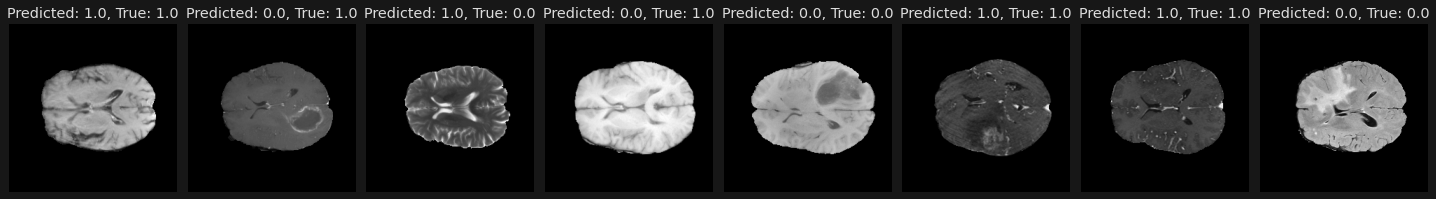

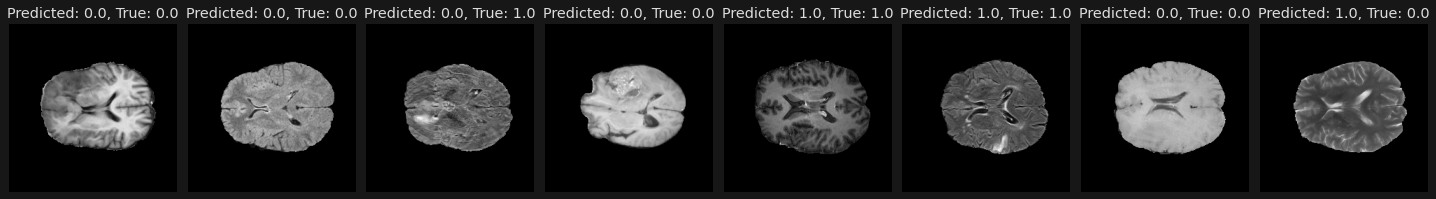

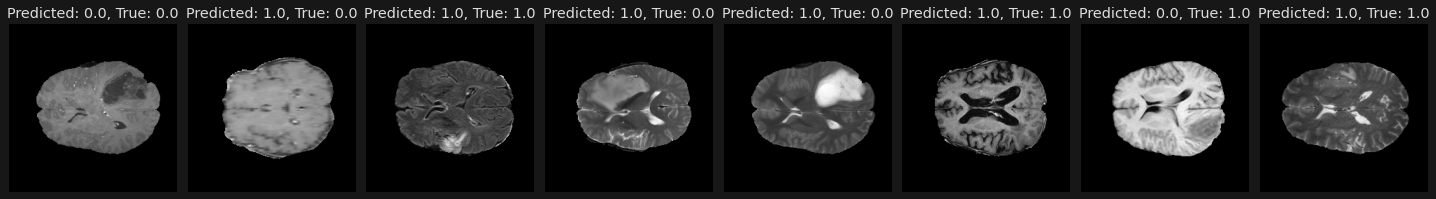

In [36]:
import matplotlib.pyplot as plt
import random

def plot_images_with_predictions(model, dataloader, num_images=3, threshold=0.5):
    device = next(model.parameters()).device
    model.eval()

    # Randomly select some images from the dataloader
    samples = random.sample(list(dataloader), num_images)
    
    for i, (inputs, labels) in enumerate(samples):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        with torch.no_grad():
            outputs = model(inputs).squeeze()
            predictions = (outputs > threshold).float()

        # Convert tensors to numpy arrays
        inputs = inputs.cpu().numpy()
        predictions = predictions.cpu().numpy()
        labels = labels.cpu().numpy()

        # Plot the images and predictions
        plt.figure(figsize=(20, 5))
        for j in range(inputs.shape[0]):
            plt.subplot(1, inputs.shape[0], j + 1)
            plt.imshow(inputs[j, 0], cmap='gray')
            plt.title(f"Predicted: {predictions[j]}, True: {labels[j]}")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

# Assuming `model`, `val_dataloader`, and `train_dataloader` are defined
plot_images_with_predictions(model, val_dataloader)

# 

# GoogleNet

In [55]:
class MRIDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        img = nib.load(img_path).get_fdata()

        if img.ndim == 3:
            img = img[:, :, img.shape[2] // 2]
        img = np.expand_dims(img, axis=0)
        
        img = torch.tensor(img, dtype=torch.float32)
        
        # Apply transformations if available
        if self.transform:
            img = self.transform(img)

        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return img, label

In [56]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
      # Input: 
      # - f1: number of filters of the 1x1 convolutional layer in the first path
      # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
      # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
      # - f4: number of filters of the 1x1 convolutional layer in the fourth path

      # 1st path:
    path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

      # 2nd path
    path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

      # 3rd path
    path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

      # 4th path
    path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
    path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

    output_layer = concatenate([path1, path2, path3, path4], axis = -1)

    return output_layer

In [57]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import nibabel as nib
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from tqdm import tqdm

from keras.models import Model
from keras.layers import Input, Conv2D,GlobalAveragePooling2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose,AveragePooling2D, BatchNormalization, Dropout, Lambda,Dense, Flatten
from keras.optimizers import Adam
def GoogLeNet(input_shape, num_classes):
  # input layer 
    input_layer = Input(input_shape)

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
    X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
    X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
    X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
    X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
    X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
    X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
    X1 = Flatten()(X1)
    X1 = Dense(1024, activation = 'relu')(X1)
    X1 = Dropout(0.7)(X1)
    X1 = Dense(5, activation = 'softmax')(X1)

  
  # 4th Inception block
    X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
    X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
    X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
    X2 = Flatten()(X2)
    X2 = Dense(1024, activation = 'relu')(X2)
    X2 = Dropout(0.7)(X2)
    X2 = Dense(1000, activation = 'softmax')(X2)
  
  
  # 7th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
    X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
    X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
    X = Dropout(0.4)(X)

  # output layer 
    X = Dense(num_classes, activation='sigmoid')(X)  # Use 'sigmoid' for binary classification
  
  # model
    model = Model(input_layer, X, name = 'GoogLeNet')

    return model

input_shape = (240, 240, 1)  # Adjust input shape according to your data
num_classes = 1  # Number of output classes
model = GoogLeNet(input_shape, num_classes)
model.summary()


Model: "GoogLeNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 240, 240, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_652 (Conv2D)           │ (None, 117, 117, 64)      │           3,200 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_145             │ (None, 58, 58, 64)        │               0 │ conv2d_652[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_653 (Conv2D)           │ (None, 58, 58, 64)        │           4,160 │ max_pooling2d_145[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_654 (Conv2D)           │ (None, 58, 58, 192)       │         110,784 │ conv2d_653[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_146             │ (None, 28, 28, 192)       │               0 │ conv2d_654[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_656 (Conv2D)           │ (None, 28, 28, 96)        │          18,528 │ max_pooling2d_146[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_658 (Conv2D)           │ (None, 28, 28, 16)        │           3,088 │ max_pooling2d_146[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_147             │ (None, 28, 28, 192)       │               0 │ max_pooling2d_146[0][0]    │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_655 (Conv2D)           │ (None, 28, 28, 64)        │          12,352 │ max_pooling2d_146[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_657 (Conv2D)           │ (None, 28, 28, 128)       │         110,720 │ conv2d_656[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_659 (Conv2D)           │ (None, 28, 28, 32)        │          12,832 │ conv2d_658[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_660 (Conv2D)           │ (None, 28, 28, 32)        │           6,176 │ max_pooling2d_147[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_99 (Concatenate)  │ (None, 28, 28, 256)       │               0 │ conv2d_655[0][0],          │
│                               │                           │                 │ conv2d_657[0][0],          │
│                               │                           │                 │ conv2d_659[0][0],          │
│                               │                           │                 │ conv2d_660[0][0]           │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 5,968,305 (22.77 MB)

 Trainable params: 5,968,305 (22.77 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.callbacks import Callback, ModelCheckpoint
import tensorflow as tf
from tqdm import tqdm

# Callback for printing the confusion matrix at the end of each epoch
class ConfusionMatrixCallback(Callback):
    def __init__(self, val_generator, val_steps):
        super(ConfusionMatrixCallback, self).__init__()
        self.val_generator = val_generator
        self.val_steps = val_steps

    def on_epoch_end(self, epoch, logs=None):
        val_true = []
        val_pred = []

        for step in range(self.val_steps):
            images, true_labels = next(self.val_generator)
            predictions = self.model.predict(images)

            val_true.extend(true_labels)
            val_pred.extend(np.round(predictions).astype(int))

        val_true = np.array(val_true)
        val_pred = np.array(val_pred)
        cm = confusion_matrix(val_true, val_pred)

        print(f'\nConfusion Matrix at epoch {epoch + 1}:\n{cm}')

def calculate_accuracy(outputs, labels, threshold=0.5):
    preds = (outputs > threshold).astype(np.float32)
    correct = np.equal(preds, labels).sum().item()
    return correct / labels.size

def save_model(model, path='model.pth'):
    try:
        torch.save(model.state_dict(), path)
        print(f'Model saved as {path}')
    except Exception as e:
        print(f"Error saving model: {e}")
# Custom data generator function to convert PyTorch DataLoader output to Keras-compatible format
def keras_data_generator(dataloader):
    while True:
        for inputs, labels in dataloader:
            # Convert PyTorch tensors to numpy arrays and adjust shape if needed
            inputs = inputs.numpy()
            inputs = inputs.reshape(-1, 240, 240, 1)
            labels = labels.numpy()
            # Reshape inputs if needed and yield as batches
            yield inputs, labels

def train_model(model, train_dataloader, val_dataloader, train_config, verbose=True):
    device = train_config['device']
    model.to(device)
    optimizer = Adam(model.parameters(), lr=config['learning_rate'])
    loss_fn = torch.nn.BCEWithLogitsLoss()

    train_epoch_losses = []
    train_epoch_accuracies = []
    val_epoch_losses = []
    val_epoch_accuracies = []
    val_confusion_matrices = []

    for epoch in range(train_config['n_epochs']):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        total_samples = 0

        # Set up tqdm progress bar
        pbar = tqdm(enumerate(train_dataloader), total=len(train_dataloader), desc=f"Epoch {epoch+1}/{train_config['n_epochs']}", leave=False)
        for i, (inputs, labels) in enumerate(pbar):
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs).squeeze()
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            running_corrects += preds.eq(labels).sum().item()
            total_samples += labels.size(0)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects / total_samples

            # Update tqdm postfix to show loss and accuracy
            pbar.set_postfix(loss=f"{epoch_loss:.4f}", accuracy=f"{epoch_acc:.4f}")

        train_epoch_losses.append(epoch_loss)
        train_epoch_accuracies.append(epoch_acc)

        print(f'Epoch {epoch+1} - Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}')
        save_model(model, path=f'Googlenet/Googlenet_model_epoch_{epoch+1}.pth')
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        val_total_samples = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs).squeeze()
                loss = loss_fn(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                preds = (outputs > 0.5).float()
                val_running_corrects += preds.eq(labels).sum().item()
                val_total_samples += labels.size(0)

                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_epoch_loss = val_running_loss / val_total_samples
        val_epoch_acc = val_running_corrects / val_total_samples
        val_conf_matrix = confusion_matrix(all_labels, all_preds)
        val_confusion_matrices.append(val_conf_matrix)

        print(f'Validation - Loss: {val_epoch_loss:.4f}, Acc: {val_epoch_acc:.4f}, Confusion Matrix:\n{val_conf_matrix}')

    print("Training complete.")

    return {
        "train_losses": train_epoch_losses,
        "train_accuracies": train_epoch_accuracies,
        "validation_losses": val_epoch_losses,
        "validation_accuracies": val_epoch_accuracies,
        "validation_conf_matrices": val_confusion_matrices
    }


In [53]:
model

<Functional name=GoogLeNet, built=True>

In [57]:
from torchvision import transforms


# Settings for training
train_config = {
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'n_epochs': 10,
    'batch_size': 8,
    'learning_rate': 1e-3
}

# Define data augmentation transforms
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
])
# Assuming 'hgg_files' and 'lgg_files' are preloaded lists of file paths
all_files = hgg_files + lgg_files
labels = [1] * len(hgg_files) + [0] * len(lgg_files)

# Oversample the minority class
ros = RandomOverSampler()
all_files_resampled, labels_resampled = ros.fit_resample(np.array(all_files).reshape(-1, 1), labels)
all_files_resampled = all_files_resampled.flatten().tolist()

# Splitting the combined list into training and validation datasets
train_files, val_files, train_labels, val_labels = train_test_split(all_files_resampled, labels_resampled, test_size=0.2, random_state=42)

# Create dataset instances
train_dataset = MRIDataset(train_files, train_labels)
val_dataset = MRIDataset(val_files, val_labels)  # No augmentation for validation


# Create DataLoader instances for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Set up the directory to save the models
model_save_dir = 'Googlenet'
os.makedirs(model_save_dir, exist_ok=True)

# Define the ModelCheckpoint callback to save the model
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(model_save_dir, 'Googlenet_model_epoch_{epoch:02d}.keras'),
    save_best_only=False,  # Change to True if you only want to save the best model
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    verbose=1
)
confusion_matrix_callback = ConfusionMatrixCallback(val_generator, len(val_dataloader))
# Convert PyTorch DataLoaders to Keras-compatible generators for training and validation
train_generator = keras_data_generator(train_dataloader)
val_generator = keras_data_generator(val_dataloader)



In [58]:
# Compile the Keras model
model.compile(
    optimizer=Adam(learning_rate=train_config['learning_rate']), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

# Train the model using the fit method
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=len(train_dataloader),  # Number of steps per epoch
    epochs=train_config['n_epochs'],  # Number of epochs
    validation_data=val_generator,  # Validation data generator
    validation_steps=len(val_dataloader),  # Number of validation steps
    callbacks=[checkpoint_callback,confusion_matrix_callback],
    verbose=1  # Verbosity mode: 0 (silent), 1 (progress bar), 2 (one line per epoch)
)
# Extract training history
train_epoch_losses = history.history['loss']
train_epoch_accuracies = history.history['accuracy']
val_epoch_losses = history.history['val_loss']
val_epoch_accuracies = history.history['val_accuracy']


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.7992 - loss: 0.4924
Epoch 1: saving model to Googlenet\Googlenet_model_epoch_01.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

Confusion Matrix at epoch 2:
[[367  98]
 [ 67 406]]
469/469 ━━━━━━━━━━━━━━━━━━━━ 421s 899ms/step - accuracy: 0.8640 - loss: 0.4420 - val_accuracy: 0.8252 - val_loss: 0.4551
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.8628 - loss: 0.3586
Epoch 3:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

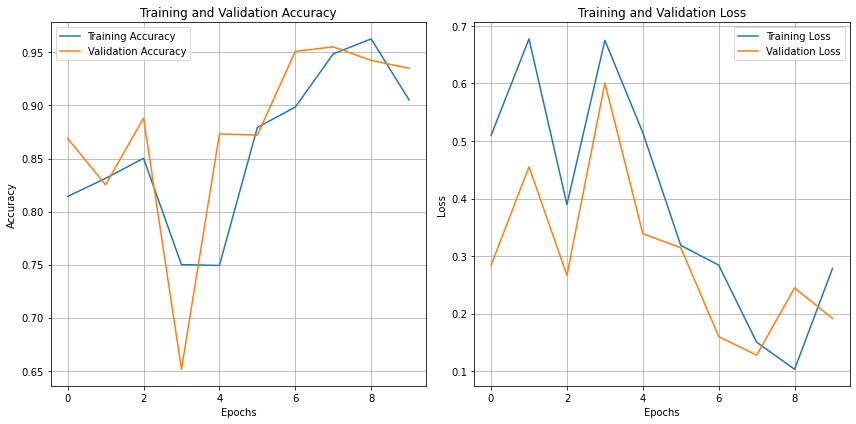

In [61]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))

# Plot Accuracies
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Losses
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


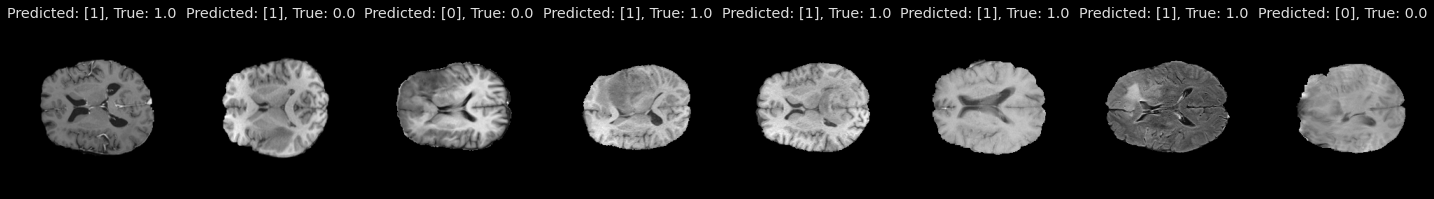

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


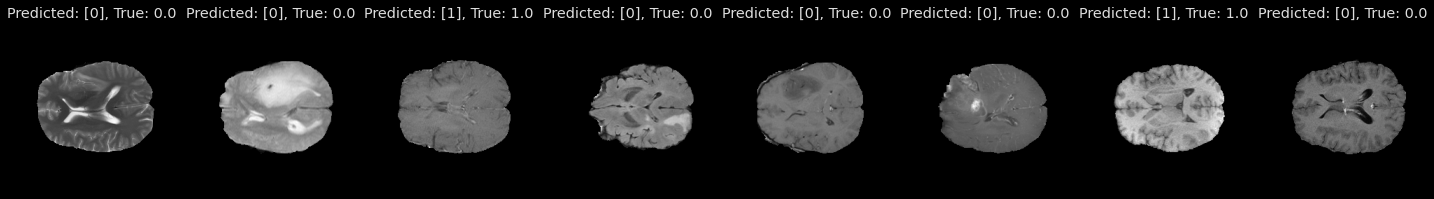

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


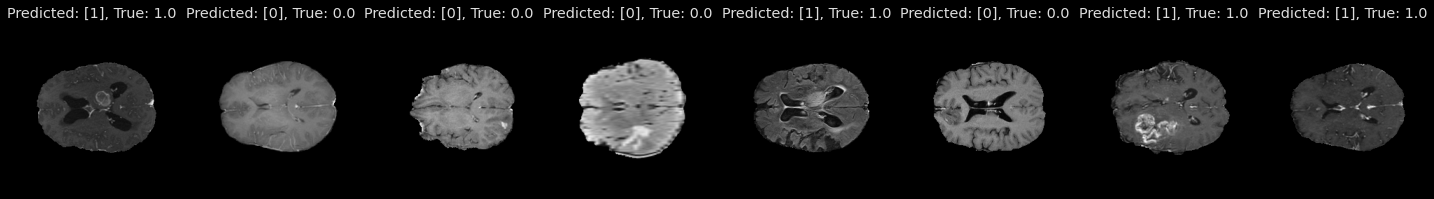

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_images_with_predictions(model, dataloader, num_images=3, threshold=0.5):
    # Randomly select some images from the dataloader
    samples = random.sample(list(dataloader), num_images)
    
    for i, (inputs, labels) in enumerate(samples):
        # Convert inputs and labels to numpy arrays
        inputs = inputs.numpy()
        labels = labels.numpy()

        # Reshape the inputs to match the model's input shape
        inputs = inputs.reshape(-1, 240, 240, 1)

        # Forward pass
        predictions = model.predict(inputs)
        predictions = (predictions > threshold).astype(int)

        # Plot the images and predictions
        plt.figure(figsize=(20, 5), facecolor='black')
        for j in range(inputs.shape[0]):
            plt.subplot(1, inputs.shape[0], j + 1)
            plt.imshow(inputs[j, :, :, 0], cmap='gray')
            plt.title(f"Predicted: {predictions[j]}, True: {labels[j]}")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

# Load the best model
best_model = tf.keras.models.load_model('Googlenet\Googlenet_model_epoch_07.keras')

# Plot images with predictions using the best model
plot_images_with_predictions(best_model, val_dataloader)
